In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0, low_memory=False)

In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
 df[df['_STATE'].isin([9,34,36])].head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [6]:
# your code here
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [7]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here

zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [10]:
df.shape

(34545, 358)

In [11]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [12]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [13]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

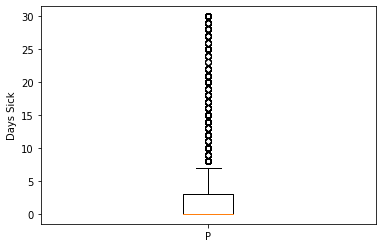

In [14]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()


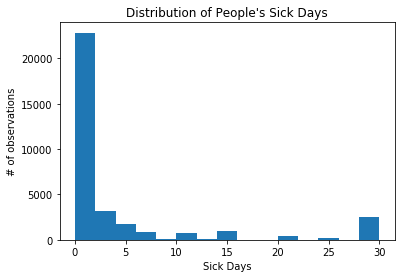

In [15]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [16]:
# code to calculate the average number of sick days by state

df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [17]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

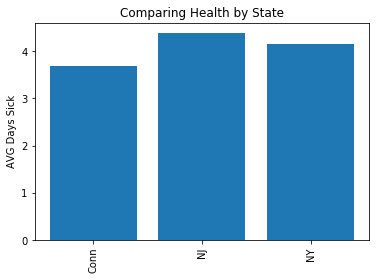

In [18]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

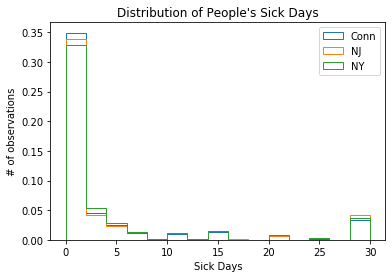

In [19]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [20]:
def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

In [21]:
# code to create new colum for chronically sick

df['CHRONIC'] = np.where(df['PHYSHLTH']>=15, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [22]:
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

In [23]:
# code to calculate averages per state
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

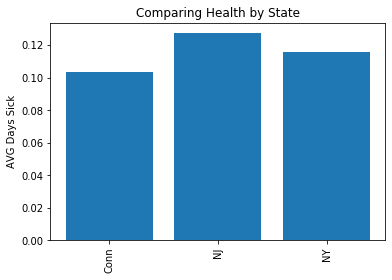

In [24]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [25]:
df.shape

(33747, 360)

In [26]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [27]:
df['SMOKDAY2'].value_counts().sum()

13468

In [28]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])




In [29]:
df['smoking'].value_counts().sum()

32153

In [30]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [31]:
df['smoking'].count()

32359

In [32]:
df['smoking'].describe()

count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [33]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

In [34]:
smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

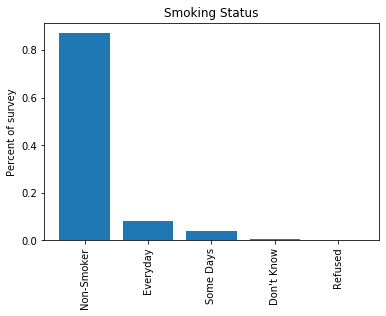

In [35]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [36]:
df.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [37]:
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [38]:
state_pcts

smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [39]:
state_pcts.unstack()

smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

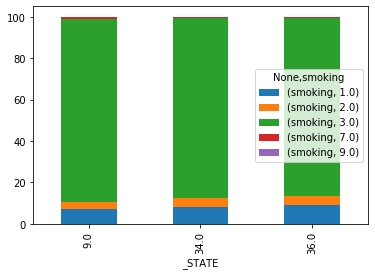

In [40]:
state_pcts.unstack().plot(kind='bar', stacked=True)

In [41]:
#your code here

zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [42]:
df['smoking_cat']

49938         non
49939         non
49940         non
49941         non
49942         non
           ...   
303774      every
303775        non
303776        non
303777    unknown
303778        non
Name: smoking_cat, Length: 33747, dtype: object

In [43]:
state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

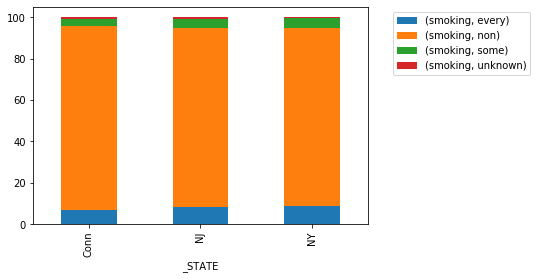

In [44]:
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [45]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

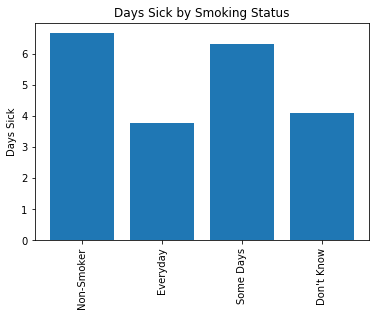

In [46]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [47]:
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)



In [48]:
df['alcohol']

49938     101.0
49939     230.0
49940       0.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775      0.0
303776    204.0
303777      NaN
303778    230.0
Name: alcohol, Length: 33747, dtype: float64

In [49]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [50]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [51]:
df['alcohol'].describe()

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


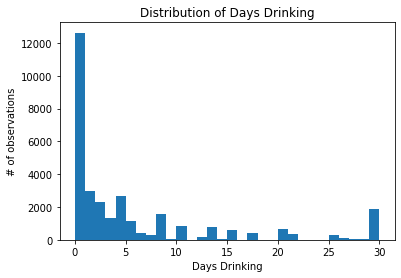

In [52]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [53]:
# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

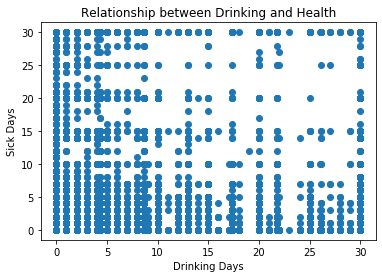

In [54]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [55]:
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.091154
Name: PHYSHLTH, dtype: float64

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [56]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hypotheses below:

1. Smoking increases your chances of feeling sick more days. 

2. Alcohol has no affect on the number of days you feel sick.

3.  People in NJ are less healty than people in Conn.

## Statistical Tests 

Below are a number of questions that test the topics covered over the last 3 days. After reading each question, determine the correct satistic or correct statistical stest for each question. After doing your calculations, be sure to still answer the question.  

1) What is the average number of sick days per person in this sample?

In [57]:
avg_sick = df['PHYSHLTH'].mean()
avg_sick

4.085340919192817

2) What is the standard deviation of the number of sick days in this sample?

In [58]:
std_dev = np.std(df['PHYSHLTH'])
std_dev

8.513166517403645

3) Describe the distribution of sick days (normal or not, skewness, kurtosis).

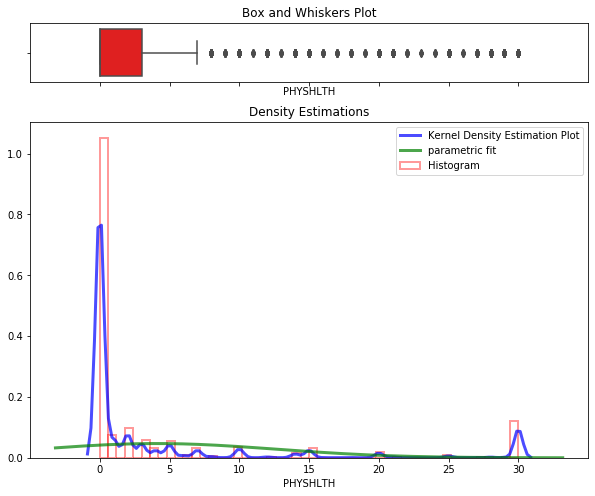

In [59]:
import seaborn as sns
import scipy.stats as stats
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(df['PHYSHLTH'], 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=df['PHYSHLTH'], ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
#ax2.set(ylim=(0, .08))
#plt.ylim(0,0.11)
plt.legend();

In [60]:
skewness = stats.skew(df['PHYSHLTH'])
skewness

2.2888051759296246

In [61]:
kurtosis = stats.kurtosis(df['PHYSHLTH'])
kurtosis

3.915412964186044

In [62]:
excess_kurtosis = kurtosis-3
excess_kurtosis

0.9154129641860438

4) What is the probability of getting this sample mean (average number of sick days), if the population mean is 4?

In [63]:
z_score = (avg_sick - 4)/std_dev
z_score

0.010024580045316058

5) Create a 95% confidence interval for the average number of sick days per person.

In [64]:
c_i = (((avg_sick-(1.96*std_dev)/(len(df['PHYSHLTH'])**(1/2))),(avg_sick+(1.96*std_dev)/(len(df['PHYSHLTH'])**(1/2)))))
c_i

(3.9945108565148715, 4.176170981870763)

6) What proportion of the population is considered chronically sick?

In [65]:
sick_proportion = sum(df['CHRONIC'])/len(df['CHRONIC'])
sick_proportion

0.11595104750051856

7) Create a 95% confidence interval for the proportion of chronically sick people.

In [66]:
pop_dev = (sick_proportion*(1-sick_proportion))**(1/2)
c_i2 = (((sick_proportion-(1.96*pop_dev)/(len(df['CHRONIC'])**(1/2))),(sick_proportion+(1.96*pop_dev)/(len(df['CHRONIC'])**(1/2)))))
c_i2

(0.1125350780289385, 0.11936701697209862)

8) What is the probability of drawing this population proportion if chronically sick people is 0.10?

In [67]:
z_prop = ((sick_proportion-.1)/(((.1*.9)/len(df['CHRONIC']))**(1/2)))
z_prop

9.767547667619164

9) The CDC claims that the average American drinks 4.5 days a month. Joey, a student at UConn, thinks it is much higher. Perform a statistical test to support or reject Joey's claim. 

In [68]:
avg_drink = df['alcohol'].mean()
avg_drink

5.495244300393253

In [69]:
alc_dev = np.std(df['alcohol'])
alc_z = (avg_drink - 4.5)/(alc_dev/(len(df['alcohol'])**(1/2)))
alc_z

21.706303249384202

This z-score is quite large, and shows that we can clearly reject the null hypothesis of a mean less than 4.5 days/month

10) Do people in NJ have more sick days than people in Connecticut?

In [70]:
ct_sick = df.groupby('_STATE')['PHYSHLTH'].mean()[9]
nj_sick = df.groupby('_STATE')['PHYSHLTH'].mean()[34]
ct_dev = df.groupby('_STATE')['PHYSHLTH'].std()[9]
nj_dev = df.groupby('_STATE')['PHYSHLTH'].std()[34]
ct_people = df.groupby('_STATE')['_STATE'].count()[9]
nj_people = df.groupby('_STATE')['_STATE'].count()[34]

In [71]:
ct_c_i = (((ct_sick-(1.96*ct_dev)/(ct_people**(1/2))),(ct_sick+(1.96*ct_dev)/(ct_people**(1/2)))))
ct_c_i

(3.5329109052550525, 3.8442138426562122)

In [72]:
nj_c_i = (((nj_sick-(1.96*nj_dev)/(nj_people**(1/2))),(nj_sick+(1.96*nj_dev)/(nj_people**(1/2)))))
nj_c_i

(4.217557193974792, 4.544355879860084)

In [73]:
sample_dist = (nj_sick - ct_sick)
sample_dist

0.6923941629618056

In [74]:
sample_std = (((nj_dev**2)/nj_people)+((ct_dev**2)/ct_people)**(1/2))
sample_std

0.08636407328384652

In [75]:
sample_z = sample_dist/sample_std
sample_z

8.017155011739245

As the 95% confidence intervals for Connecticut and New Jersey don't overlap at all, we can be fairly certain that the states do in fact have more sick days/person/month on average.
Additionally, the combined Z-test for 2 population means yields a z-score of 8.017, leading us to reject the null hypothesis that there exists no difference in sick days.

11) Is there a higher proportion of chronically sick people in NY compared to NJ?

In [76]:
nj_chronic = df.groupby('_STATE')['CHRONIC'].sum()[34]
ny_chronic = df.groupby('_STATE')['CHRONIC'].sum()[36]
nj_people = df.groupby('_STATE')['_STATE'].count()[34]
ny_people = df.groupby('_STATE')['_STATE'].count()[36]
nj_chron_prop = nj_chronic/nj_people
ny_chron_prop = ny_chronic/ny_people
p_star = ((nj_chronic + ny_chronic)/(nj_people + ny_people))

In [77]:
p_star

0.12153938458901174

In [78]:
nj_chron_prop

0.12733461337057078

In [79]:
ny_chron_prop

0.1159481306837319

In [80]:
z_star = (nj_chron_prop-ny_chron_prop)/((p_star*(1-p_star)*((1/nj_people)+(1/ny_people)))**(1/2))
z_star

2.661122289760068

There is a higher proportion of sick people in NJ than in NY.

12) Do people in Connecticut drink more than people in NY?

In [81]:
ct_drink = df.groupby('_STATE')['alcohol'].mean()[9]
ny_drink = df.groupby('_STATE')['alcohol'].mean()[36]
ct_drink_dev = df.groupby('_STATE')['alcohol'].std()[9]
ny_drink_dev = df.groupby('_STATE')['alcohol'].std()[36]
ct_people = df.groupby('_STATE')['_STATE'].count()[9]
ny_people = df.groupby('_STATE')['_STATE'].count()[36]

In [82]:
print(ct_drink)
print(ny_drink)
print(ct_drink_dev)
print(ny_drink_dev)
print(ct_people)
print(ny_people)

6.199626564039405
5.3011776711078635
8.835701850704046
8.237617516154101
10413
11876


In [83]:
drink_dist = (ct_drink - ny_drink)
drink_dist

0.8984488929315413

In [84]:
drink_std = (((ny_drink_dev**2)/ny_people)+((ct_drink_dev**2)/ct_people)**(1/2))
drink_std

0.09230099043517653

In [85]:
drink_z = drink_dist/drink_std
drink_z

9.733903056679837

13) Is there a statistically significant difference in the percentage of men and women who are chronically sick?

In [86]:
sex_dict = {9:np.nan}
df['sex'] = df['SEX'].replace(sex_dict)
df['sex'].unique()

m_chronic = df.groupby('sex')['CHRONIC'].sum()[1]
f_chronic = df.groupby('sex')['CHRONIC'].sum()[2]
total_m = df.groupby('sex')['sex'].count()[1]
total_f = df.groupby('sex')['sex'].count()[2]
m_chron_prop = m_chronic/total_m
f_chron_prop = f_chronic/total_f
p_star2 = ((m_chronic + f_chronic)/(total_m + total_f))

In [87]:
p_star2

0.11592398232974592

In [88]:
z_star2 = (f_chron_prop-m_chron_prop)/((p_star2*(1-p_star2)*((1/total_m)+(1/total_f)))**(1/2))
z_star2

5.817784400161378

It seems that, much to my surprise, yes. Women have a statistically significantly higher percentage chrnoically sick than do men

14) Men are normally seen as heavier drinkers than women. Is there statistically significant evidence to support this idea?

In [89]:
drink_dict = {77 : np.nan, 99 : np.nan}
df['drinks'] = df['AVEDRNK2'].replace(drink_dict)

m_drink = df.groupby('sex')['drinks'].mean()[1]
f_drink = df.groupby('sex')['drinks'].mean()[2]
m_drink_dev = df.groupby('sex')['drinks'].std()[1]
f_drink_dev = df.groupby('sex')['drinks'].std()[2]
total_m = df.groupby('sex')['sex'].count()[1]
total_f = df.groupby('sex')['sex'].count()[2]

In [90]:
print(m_drink)
print(f_drink)
print(m_drink_dev)
print(f_drink_dev)
print(total_m)
print(total_f)

2.42377638078132
1.7143303478441991
2.779159562304082
1.6166063582400005
14818
18911


In [91]:
m_alc_days = df.groupby('sex')['alcohol'].sum()[1]
f_alc_days = df.groupby('sex')['alcohol'].sum()[2]
print(m_alc_days/total_m)
print(f_alc_days/total_f)

6.3567217519233
4.178241429855631


In [92]:
m_alc_mean = df.groupby('sex')['alcohol'].mean()[1]
m_alc_mean

6.839025841864478

15) Find another survey item to investigate and do each of the following:
    
- Create a confidence interval for the population mean or proportion.
- Perform a one sample z or t test on this data.
- Compare two of the states on this survey item.
- Compare the different sexes on this survey item. 

# Beginning of Stats_Lab

In [93]:
weight_dict = {7777:np.nan, 9999:np.nan}
df['weight2'] = df['WEIGHT2'].replace(weight_dict)

In [94]:
df['weight2'].unique()

array([ 160.,  205.,   nan,  165.,  164.,  103.,  125.,  230.,  130.,
        150.,  200.,  133.,  148.,  114.,  190.,  120.,  189.,  180.,
        140.,  131.,  135.,  155.,  156.,  137.,  166.,  175.,  128.,
        145.,  105.,  215.,  142.,  240.,  127.,  220.,  187.,  184.,
        221.,  147.,  197.,  159.,  174.,  195.,  157.,  163.,  141.,
        153.,  181.,  139.,  138.,  116.,  126.,  188.,  170.,  225.,
        143.,  110.,  172.,  124.,  176.,  198.,  210.,  207.,  194.,
        196.,  260.,  100.,  118.,  211.,  209., 9069.,  158.,  149.,
        185.,  173.,  250.,  152.,  300.,  182.,   80.,  104.,  199.,
        280.,  270.,  191.,  178.,  117.,  265.,  179.,  129.,  168.,
        134.,  161.,  315.,  242.,  102.,  115.,  112.,  201.,  192.,
        132.,  123.,  136.,  108.,  258.,  106.,  255.,  235.,  171.,
        212.,  275.,  325.,  252.,  330.,  204.,  113.,  186.,  333.,
        245.,   90.,  111.,  274.,  151.,  340.,  162.,   97.,  239.,
        285.,  290.,

In [95]:
df['new_weight'] = df['weight2'].where(df['weight2'] < 1000)

In [96]:
df['new_weight'].isna().sum()

2821

In [97]:
len(df['new_weight'])

33747

In [98]:
new_df = df.dropna(subset=['new_weight'])

In [99]:
len(new_df['new_weight'])

30926

In [100]:
new_df['new_weight'].unique()

array([160., 205., 165., 164., 103., 125., 230., 130., 150., 200., 133.,
       148., 114., 190., 120., 189., 180., 140., 131., 135., 155., 156.,
       137., 166., 175., 128., 145., 105., 215., 142., 240., 127., 220.,
       187., 184., 221., 147., 197., 159., 174., 195., 157., 163., 141.,
       153., 181., 139., 138., 116., 126., 188., 170., 225., 143., 110.,
       172., 124., 176., 198., 210., 207., 194., 196., 260., 100., 118.,
       211., 209., 158., 149., 185., 173., 250., 152., 300., 182.,  80.,
       104., 199., 280., 270., 191., 178., 117., 265., 179., 129., 168.,
       134., 161., 315., 242., 102., 115., 112., 201., 192., 132., 123.,
       136., 108., 258., 106., 255., 235., 171., 212., 275., 325., 252.,
       330., 204., 113., 186., 333., 245.,  90., 111., 274., 151., 340.,
       162.,  97., 239., 285., 290.,  85., 223., 219., 144., 295.,  83.,
       243., 121.,  92., 296., 218., 107., 244.,  95.,  98., 169., 167.,
       324., 216., 208., 224., 238., 206., 232., 24

In [101]:
bp_dict = {2:1, 3:0, 4:1, 7:np.nan, 9:np.nan}
new_df['bphigh'] = df['BPHIGH4'].replace(bp_dict)

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
new_df['bphigh'].unique()

array([ 1.,  0., nan])

In [103]:
new_df.dropna(subset=['bphigh'], inplace=True)

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
len(new_df['bphigh'])

30835

In [105]:
len(new_df['new_weight'])

30835

# CI for Sample Means

graphic showing distribution of weight

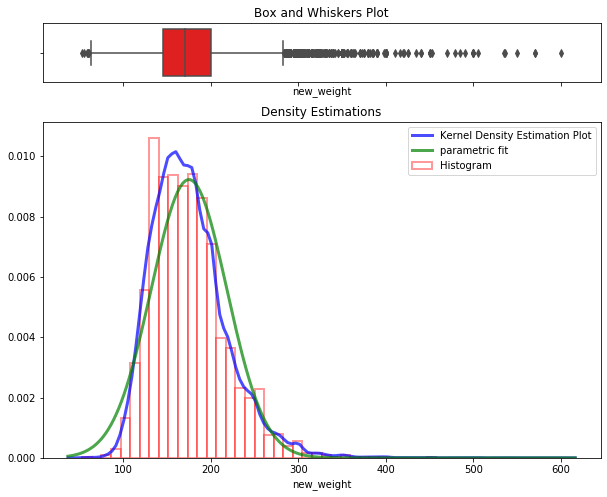

In [106]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(new_df['new_weight'], 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=new_df['new_weight'], ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
plt.legend();

function to calculate confidence interval for sample mean

In [107]:
def ci(array):
    x = array.mean()
    std_dev = array.std()
    n = len(array)
    lower_bound = (x - ((1.96*std_dev)/(n**(.5))))
    upper_bound = (x + ((1.96*std_dev)/(n**(.5))))
    tup = (lower_bound, upper_bound)
    return tup

confidence interval for sample mean of weights

In [108]:
ci(new_df['new_weight'])

(174.48834634195245, 175.45334329644547)

# CI for Sample Proportion

confidence interval for sample proportion of high blood pressure

In [109]:
bp_prop = sum(new_df['bphigh'])/len(new_df['bphigh'])
bp_dev = bp_prop*(1-bp_prop)**(.5)
bp_ci = ((bp_prop-(1.96*bp_dev)/(len(new_df['bphigh'])**(.5))), (bp_prop+(1.96*bp_dev)/(len(new_df['bphigh'])**(.5))))
bp_ci

(0.39634818169557645, 0.4032626501513507)

In [125]:
m_weight = new_df.groupby('sex')['new_weight'].mean()[1]
f_weight = new_df.groupby('sex')['new_weight'].mean()[2]
m_weight_dev = new_df.groupby('sex')['new_weight'].std()[1]
f_weight_dev = new_df.groupby('sex')['new_weight'].std()[2]
m_count = new_df.groupby('sex')['sex'].count()[1]
f_count = new_df.groupby('sex')['sex'].count()[2]
print(m_weight)
print(f_weight)
print(m_weight_dev)
print(f_weight_dev)
print(m_count)
print(f_count)

194.33548294640298
158.9437329538717
41.37694630267741
37.830166146259785
13956
16866


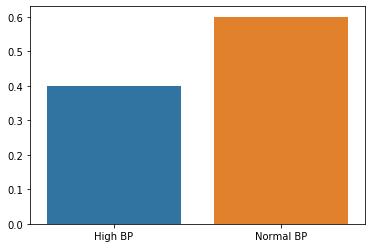

In [210]:
bp_norm_prop = 1-bp_prop
sns.barplot(['High BP', 'Normal BP'], [bp_prop, bp_norm_prop])

# Two Sample Test of Means

t-statistic for two sample (male and female) test of sample means of weight

In [126]:
weight_dist = (m_weight - f_weight)
pooled_weight_dev = ((((m_count-1)*(m_weight_dev**2))+((f_count-1)*(f_weight_dev**2)))/(m_count+f_count-2))**(.5)
denom_factor = ((1/m_count)+(1/f_count))**(.5)
#weight_std = ((m_weight_dev**2/m_count) + (f_weight_dev**2/f_count))**(.5)
#weight_z = weight_dist/weight_std
weight_t_star = (weight_dist/(pooled_weight_dev*denom_factor))
#print(weight_dist)
#print(pooled_weight_dev)
print(weight_t_star)

78.34824662838056


In [127]:
m_weight_array=new_df[new_df['sex']==1.0]['new_weight']
f_weight_array=new_df[new_df['sex']==2.0]['new_weight']

graphic displaying distributions of weight grouped by male and female

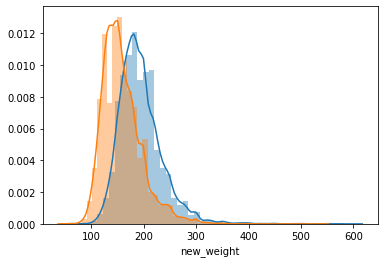

In [212]:
sns.distplot(m_weight_array)
sns.distplot(f_weight_array)

# Two Sample Test of Proportions

z-statistic for two sample (male and female) test of sample proportions of high bolld pressure

In [115]:
m_high = new_df.groupby('sex')['bphigh'].sum()[1]
f_high = new_df.groupby('sex')['bphigh'].sum()[2]
m_total = new_df.groupby('sex')['bphigh'].count()[1]
f_total = new_df.groupby('sex')['bphigh'].count()[2]
m_high_prop = m_high/m_total
f_high_prop = f_high/f_total
p_star = ((m_high + f_high)/(m_total + f_total))
z_star = (m_high_prop-f_high_prop)/((p_star*(1-p_star)*((1/m_total)+(1/f_total)))**(1/2))
z_star

7.072683003817786

In [215]:
print(m_high_prop)
print(f_high_prop)

0.4215391229578676
0.38189256492351475


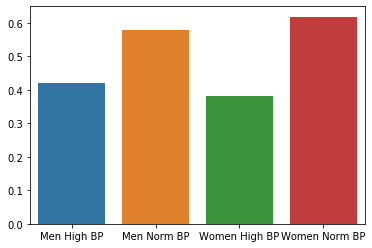

In [209]:
m_norm_prop = 1-m_high_prop
f_norm_prop = 1-f_high_prop
sns.barplot(['Men High BP', 'Men Norm BP', 'Women High BP', 'Women Norm BP'], [m_high_prop, m_norm_prop, f_high_prop, f_norm_prop])

# Chi-Squared Test

Chi-squared test to determine whether being male or female increases likelihood of high blood pressure

In [133]:
m_norm = m_count - m_high
f_norm = f_count - f_high
total_high = m_high + f_high
total_norm = m_count + f_count - total_high
print(m_high)
print(m_norm)
print(f_high)
print(f_norm)
print(total_high)
print(total_norm)

5883.0
8073.0
6441.0
10425.0
12324.0
18498.0


In [138]:
observed = [(m_norm,m_high),(f_norm,f_high)]
m_high_e = (m_count/(m_count + f_count))*total_high
m_norm_e = (m_count/(m_count + f_count))*total_norm
f_high_e = (f_count/(m_count + f_count))*total_high
f_norm_e = (f_count/(m_count + f_count))*total_norm
print(m_high_e)
print(m_norm_e)
print(f_high_e)
print(f_norm_e)
expected = [(m_norm_e,m_high_e),(f_norm_e,f_high_e)]

5580.226591395756
8375.773408604244
6743.773408604244
10122.226591395756


In [140]:
chi_stat = 0
for i in range(0,2):
    for j in range(0,2):
        chi_stat += (((observed[i][j]-expected[i][j])**2)/(expected[i][j]))
chi_stat

50.0228448724929

As I have chosen to use a significance level alpha = .01, and have a 2x2 contingency table, yielding a rejection level of 6.63, the obtained value of the chi_square test of 50.023 leads us to reject the null hyptothesis that sex does not have an impact on likelihood of high blood pressure. 

In [141]:
stats.f_oneway(new_df['new_weight'][new_df['sex'] == 1.0],
                new_df['new_weight'][new_df['sex'] == 2.0])

F_onewayResult(statistic=6138.447749741569, pvalue=0.0)

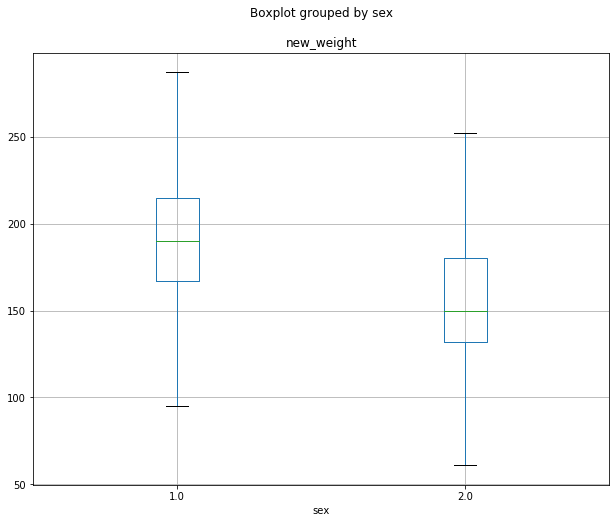

In [144]:
new_df.boxplot('new_weight', by = 'sex', showfliers=False, figsize = (10,8))

# Beginning of Second Attempt

clean marriage column

In [182]:
marital_dict = {1:'married', 2:'separated', 3:'separated', 4:'separated', 5:'unmarried', 6:'unmarried', 9:'unmarried'}
new_df['marital'] = new_df['MARITAL'].replace(marital_dict)

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### distribution of weights grouped by sex and marital status

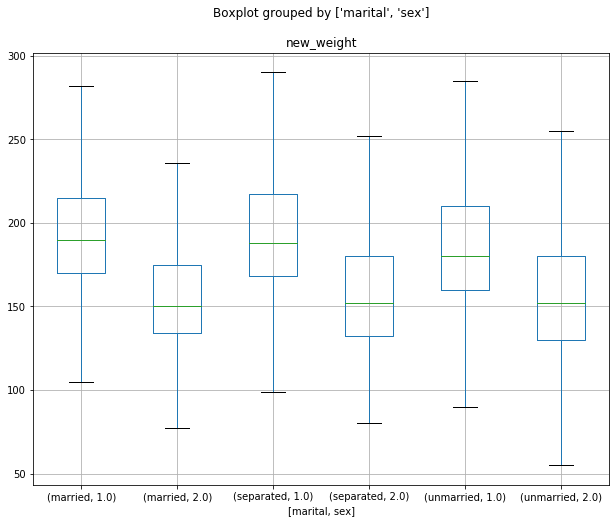

In [183]:
new_df.boxplot('new_weight', by = ['marital', 'sex'], showfliers=False, figsize = (10,8))

### one-way ANOVA to determine whether there exists difference in weight when sample is grouped by marital status

In [203]:
stats.f_oneway(new_df['new_weight'][new_df['marital'] == 'married'],
                new_df['new_weight'][new_df['marital'] == 'separated'],
              new_df['new_weight'][new_df['marital'] == 'unmarried'])

F_onewayResult(statistic=69.12707503482264, pvalue=1.1107136894137757e-30)

In [214]:
print(married_weight_array.mean())
print(separated_weight_array.mean())
print(unmarried_weight_array.mean())

176.8664596273292
170.2989072964399
176.51112656467316


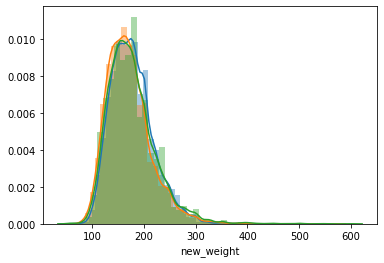

In [204]:
married_weight_array = new_df[new_df['marital']=='married']['new_weight']
separated_weight_array = new_df[new_df['marital']=='separated']['new_weight']
unmarried_weight_array = new_df[new_df['marital']=='unmarried']['new_weight']
sns.distplot(married_weight_array)
sns.distplot(separated_weight_array)
sns.distplot(unmarried_weight_array)

### chi-squared test to determine whether there exist differences in proportion diagnosed with blood pressure when sample is grouped by marital status

In [185]:
married_count = len(new_df[new_df['marital'] == 'married'])
separated_count = len(new_df[new_df['marital'] == 'separated'])
unmarried_count = len(new_df[new_df['marital'] == 'unmarried'])
print(married_count)
print(separated_count)
print(unmarried_count)

15134
8511
7190


In [189]:
married_high = new_df.groupby('marital')['bphigh'].sum()['married']
married_norm = (married_count - married_high)
separated_high = new_df.groupby('marital')['bphigh'].sum()['separated']
separated_norm = (separated_count - separated_high)
unmarried_high = new_df.groupby('marital')['bphigh'].sum()['unmarried']
unmarried_norm = (unmarried_count - unmarried_high)
marital_observed = [[married_norm, separated_norm, unmarried_norm], [married_high, separated_high, unmarried_high]]

In [190]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, marital_expected = chi2_contingency(marital_observed)
print('dof=%d' % dof)
print(marital_expected)

dof=2
[[9083.34483541 5108.25610508 4315.39905951]
 [6050.65516459 3402.74389492 2874.60094049]]


In [191]:
prob = 0.99
critical = chi2.ppf(prob, dof)

In [192]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.990, critical=9.210, stat=902.594
Dependent (reject H0)


In [194]:
marital_chi_stat = 0
for i in range(0,2):
    for j in range(0,3):
        marital_chi_stat += (((marital_observed[i][j]-marital_expected[i][j])**2)/(marital_expected[i][j]))
marital_chi_stat

902.5937391682806

In [195]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.010, p=0.000
Dependent (reject H0)


In [196]:
married_prop = married_high/married_count
separated_prop = separated_high/separated_count
unmarried_prop = unmarried_high/unmarried_count
print(married_prop)
print(separated_prop)
print(unmarried_prop)

0.3808642791066473
0.5233227587827517
0.29346314325452016


### proportion of married, separated, and unmarried individuals diagnosed with high blood pressure

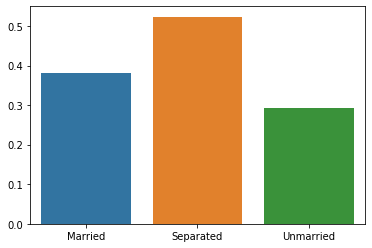

In [205]:
sns.barplot(['Married', 'Separated', 'Unmarried'], [married_prop, separated_prop, unmarried_prop])